# import python modules

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier

# helper functions (if necessary)

In [26]:
#python code...

# read in training data 

In [63]:
train_df = pd.read_csv('train.tsv', delimiter='\t')
print(train_df)

       STG   SCG   STR   LPR   PEG       UNS
0    0.570  0.37  0.75  0.27  0.32       Low
1    0.160  0.16  0.80  0.50  0.50    Middle
2    0.245  0.26  0.38  0.49  0.27       Low
3    0.295  0.59  0.29  0.31  0.55    Middle
4    0.523  0.41  0.55  0.60  0.22       Low
..     ...   ...   ...   ...   ...       ...
317  0.280  0.16  0.69  0.33  0.78      High
318  0.000  0.62  0.52  0.26  0.07  Very_Low
319  0.280  0.65  0.40  0.65  0.13       Low
320  0.210  0.88  0.87  0.56  0.95      High
321  0.200  0.52  0.36  0.84  0.25    Middle

[322 rows x 6 columns]


# visualize data

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0           Low
1        Middle
2           Low
3        Middle
4           Low
         ...   
317        High
318    Very_Low
319         Low
320        High
321      Middle
Name: UNS, Length: 322, dtype: object

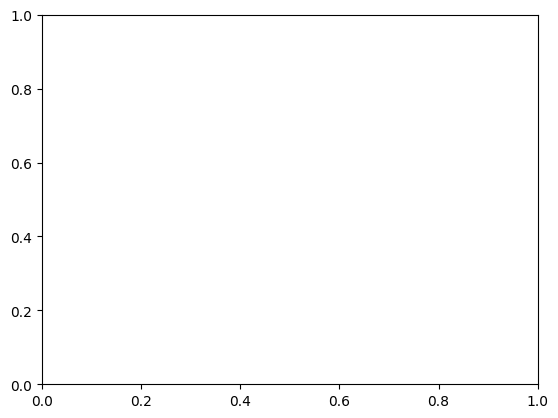

In [64]:
plt.scatter(train_df['STG'], train_df['PEG'], c=train_df['UNS'])
plt.xlabel('STG')
plt.ylabel('PEG')
plt.show()

# experiment with building classification models

In [65]:
X = train_df[['STG', 'SCG', 'STR', 'LPR', 'PEG']]
y = train_df['UNS']

np.random.seed(42)
shuffle_index = np.random.permutation(len(train_df))
X_train, y_train = X.iloc[shuffle_index[:1000]], y.iloc[shuffle_index[:1000]]
X_val, y_val = X.iloc[shuffle_index[1000:]], y.iloc[shuffle_index[1000:]]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
print('Accuracy:', accuracy_score(y_val, y_pred))
print('Precision:', precision_score(y_val, y_pred, average='weighted'))
print('Recall:', recall_score(y_val, y_pred, average='weighted'))

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by KNeighborsClassifier.

# visualize experimental results (accuracy, precision, recall)

Accuracy (CV): 0.8571428571428571
Precision (CV): 0.8637019888473787
Recall (CV): 0.8571428571428571


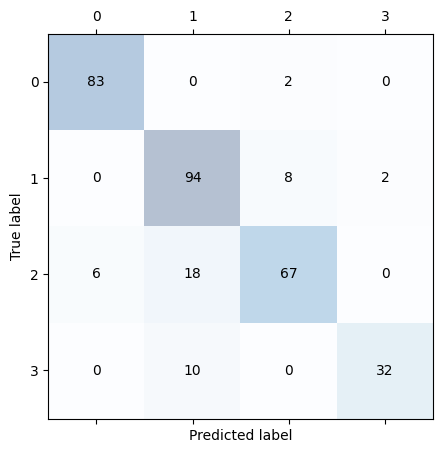

In [66]:
y_pred_cv = cross_val_predict(knn, X, y, cv=5)
print('Accuracy (CV):', accuracy_score(y, y_pred_cv))
print('Precision (CV):', precision_score(y, y_pred_cv, average='weighted'))
print('Recall (CV):', recall_score(y, y_pred_cv, average='weighted'))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y, y_pred_cv)
fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,
                s=conf_mat[i, j],
                va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


# Question: What features and classifier parameters work "best"?

# create "best" classification model on training data

# read in test data

In [68]:
test_df = pd.read_csv('test.tsv', delimiter='\t')

# use model to make predictions of test data 

# visualize test data with predicted labels

# write test data and predictions to \<YourLastName>.tsv

In [ ]:
test_df.to_csv('Rakowicz.tsv', sep='\t', index=False)